##  Predicting the selling price of a house requires feature engineering and then developing an applicable model. 

### I'm going to use this project as inspiration " https://jse.amstat.org/v19n3/decock.pdf"
                                                       

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as xp
import seaborn as sns

In [2]:
path = ""

df = pd.read_csv(path+"Ames_Housing_Data.csv")

In [3]:
null = df.isna().sum().sort_values(ascending=False)
null[(null > 0)]

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
dtype: int64

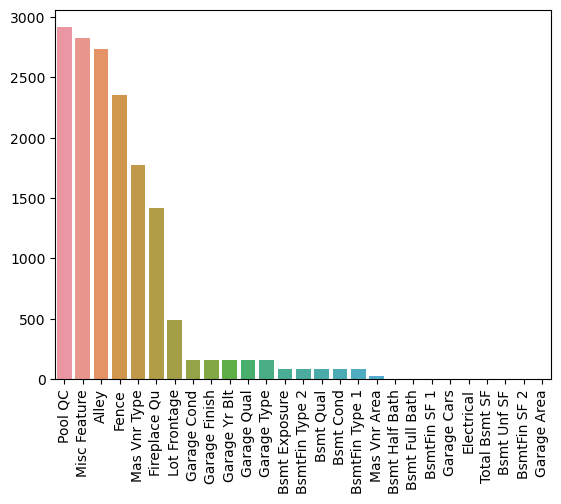

In [4]:
sns.barplot(x = null[(null > 0)].index, y =null[(null > 0)].values)
plt.xticks(rotation=90);

In [5]:
df["Pool QC"].unique()

array([nan, 'Ex', 'Gd', 'TA', 'Fa'], dtype=object)

In [6]:
df["Misc Feature"].unique()

array([nan, 'Gar2', 'Shed', 'Othr', 'Elev', 'TenC'], dtype=object)

In [7]:
df["Alley"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2925    NaN
2926    NaN
2927    NaN
2928    NaN
2929    NaN
Name: Alley, Length: 2930, dtype: object

In [8]:
df = df.drop(["PID", "Pool QC", "Misc Feature", "Alley", "Fence"],axis=1)

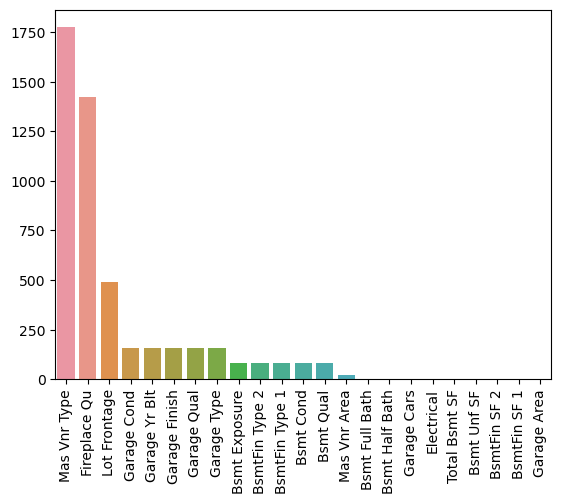

In [9]:
null = df.isna().sum().sort_values(ascending=False)
sns.barplot(x = null[(null > 0)].index, y =null[(null > 0)].values)
plt.xticks(rotation=90);

In [10]:
null = df.isna().sum().sort_values(ascending=False)
null_percent = null[(null > 0)]/len(df)*100 

In [11]:
null_percent[(null_percent <1)]

Mas Vnr Area      0.784983
Bsmt Full Bath    0.068259
Bsmt Half Bath    0.068259
Garage Cars       0.034130
Electrical        0.034130
Total Bsmt SF     0.034130
Bsmt Unf SF       0.034130
BsmtFin SF 2      0.034130
BsmtFin SF 1      0.034130
Garage Area       0.034130
dtype: float64

In [12]:
df = df.drop(df[df["Bsmt Half Bath"].isnull()].index)

In [13]:
null = df.isna().sum().sort_values(ascending=False)
null_percent = null[(null > 0)]/len(df)*100 

In [14]:
null_percent[(null_percent <1)]

Mas Vnr Area    0.785519
Garage Area     0.034153
Electrical      0.034153
Garage Cars     0.034153
dtype: float64

In [15]:
df[df["Mas Vnr Area"].isnull()].isna().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      6
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [16]:
df = df.drop(df[df["Mas Vnr Area"].isnull()].index)

In [17]:
null = df.isna().sum().sort_values(ascending=False)
null_percent = null[(null > 0)]/len(df)*100 

In [18]:
df_num = df.select_dtypes([int,float])
df_str = df.select_dtypes(object)

In [19]:
null_num = df_num.isna().sum().sort_values(ascending=False)
null_percent_num = null_num[(null_num > 0)]/len(df)*100 

In [20]:
null_percent_num

Lot Frontage     16.660929
Garage Yr Blt     5.438898
Garage Cars       0.034423
Garage Area       0.034423
dtype: float64

In [21]:
# Before to decided ti fillna in num colums with the mean or 0 i tried to figure out a relation with lot frontage and Neighborhood

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

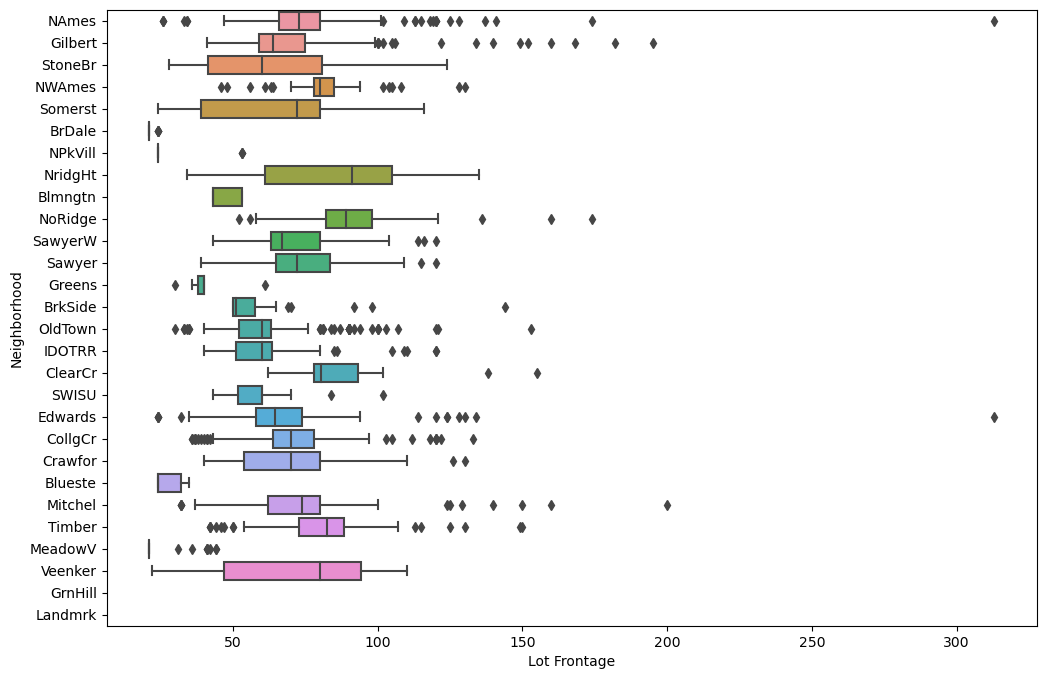

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df["Lot Frontage"], y = df["Neighborhood"])

In [23]:
df["Lot Frontage"] = df.groupby("Neighborhood")["Lot Frontage"].transform(lambda value : value.fillna(value.mean()))

In [24]:
df_num = df.select_dtypes([int,float])
df_num.corr()["SalePrice"].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799077
Gr Liv Area        0.708098
Garage Cars        0.646970
Garage Area        0.639164
Total Bsmt SF      0.634498
1st Flr SF         0.625461
Year Built         0.558219
Full Bath          0.545822
Year Remod/Add     0.531942
Garage Yr Blt      0.531044
Mas Vnr Area       0.508640
TotRms AbvGrd      0.496281
Fireplaces         0.474928
BsmtFin SF 1       0.433734
Lot Frontage       0.352042
Wood Deck SF       0.328698
Open Porch SF      0.307278
Half Bath          0.282059
Bsmt Full Bath     0.276781
2nd Flr SF         0.271105
Lot Area           0.265804
Bsmt Unf SF        0.183442
Bedroom AbvGr      0.144890
Screen Porch       0.114308
Pool Area          0.069113
3Ssn Porch         0.032945
Mo Sold            0.030722
BsmtFin SF 2       0.008075
Misc Val          -0.015309
Yr Sold           -0.027761
Bsmt Half Bath    -0.034716
Low Qual Fin SF   -0.037339
MS SubClass       -0.083669
Overall Cond      -0.099807
Kitchen AbvGr     -0

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

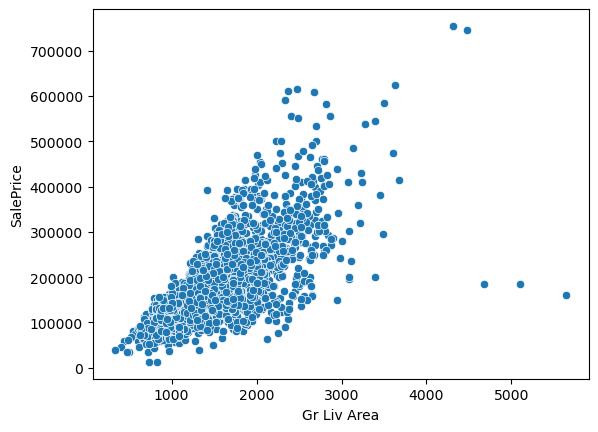

In [25]:
sns.scatterplot(x = df["Gr Liv Area"], y =df["SalePrice"])

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

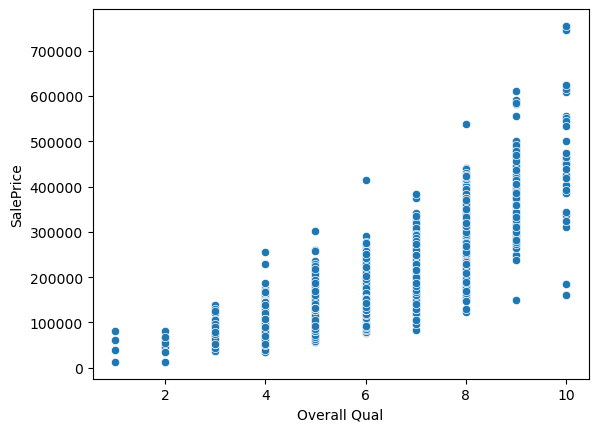

In [26]:
sns.scatterplot(x = df["Overall Qual"], y =df["SalePrice"])

In [28]:
df[(df["Gr Liv Area"] > 4000) & (df["SalePrice"] < 400000)].index

Index([1498, 2180, 2181], dtype='int64')

In [30]:
df = df.drop(df[(df["Gr Liv Area"] > 4000) & (df["SalePrice"] < 400000)].index,axis=0)

In [31]:
df_num = df.select_dtypes([int,float])
df_str = df.select_dtypes(object)

In [35]:
df_num_fill = df.select_dtypes([int,float]).fillna(0)
df_str_fill = df.select_dtypes([object]).fillna("None")

In [50]:
df[df_num_fill.columns]= df.select_dtypes([int,float]).fillna(0)

In [51]:
df[df_str_fill.columns]= df.select_dtypes([object]).fillna("None")

In [58]:
df_cat = pd.get_dummies(df.select_dtypes([object]),drop_first=True, dtype=int)

In [60]:
df_concat = pd.concat([df_cat, df.select_dtypes([int,float])],axis=1)

In [64]:
df_concat.corr()["SalePrice"].sort_values()

Exter Qual_TA       -0.591333
Kitchen Qual_TA     -0.526470
Fireplace Qu_None   -0.481147
Bsmt Qual_TA        -0.452321
Garage Finish_Unf   -0.421969
                       ...   
1st Flr SF           0.650175
Total Bsmt SF        0.663183
Gr Liv Area          0.728726
Overall Qual         0.802439
SalePrice            1.000000
Name: SalePrice, Length: 261, dtype: float64

In [83]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet

In [77]:
X = df_concat.drop("SalePrice",axis=1)
y = df_concat["SalePrice"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 0)

In [80]:
model_regul = StandardScaler()
X_train = model_regul.fit_transform(X_train)
X_test = model_regul.transform(X_test)

In [87]:
model_regression = ElasticNet(max_iter=100000)

In [88]:
param_grid = {"alpha" : [0.1,0.5,1,10,20,50,70,90,99],
             "l1_ratio" : [01.,0.2,0.5,0.7,0.9,0.99,1]}

grid_model = GridSearchCV(estimator = model_regression,
                         param_grid = param_grid,
                          scoring= "neg_mean_squared_error",
                          cv = 5,
                          verbose=2
                          )

In [89]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
[CV] END ............................alpha=0.1, l1_ratio=1.0; total time=  13.4s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.469e+10, tolerance: 1.061e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=1.0; total time=  21.9s
[CV] END ............................alpha=0.1, l1_ratio=1.0; total time=   4.4s
[CV] END ............................alpha=0.1, l1_ratio=1.0; total time=   4.7s
[CV] END ............................alpha=0.1, l1_ratio=1.0; total time=   8.6s
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.469e+10, tolerance: 1.061e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=  20.8s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   4.3s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   4.9s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   8.7s
[CV] END ............................alpha=0.5, l1_ratio=1.0; total time=   1.4s
[CV] END ............................alpha=0.5, l1_ratio=1.0; total time=   6.7s
[CV] END ............................alpha=0.5, l1_ratio=1.0; total time=   2.6s
[CV] END ............................alpha=0.5, l1_ratio=1.0; total time=   2.1s
[CV] END ............................alpha=0.5, l1_ratio=1.0; total time=   6.4s
[CV] END ............................alpha=0.5, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.2; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=100000),
             param_grid={'alpha': [0.1, 0.5, 1, 10, 20, 50, 70, 90, 99],
                         'l1_ratio': [1.0, 0.2, 0.5, 0.7, 0.9, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [90]:
grid_model.best_params_


{'alpha': 99, 'l1_ratio': 1.0}

In [91]:
predict = grid_model.predict(X_test)

In [92]:
mean_squared_error(y_test, predict)

506739097.7767925

In [95]:
mean_absolute_error(y_test, predict)

15268.46992853378

In [96]:
np.sqrt(mean_squared_error(y_test, predict))

22510.866215603357